In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize  # 用来设置图片大小
import seaborn as sns
from sklearn.model_selection import train_test_split  # 训练集测试集划分
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

In [ ]:
data = data.replace(to_replace='Not Available', value=np.nan)

# print('替换缺失值后的nan值个数\n', data.isna().sum())
# todo:2-将原本为数值列的列(当前object列)转换成数值列,通过观察数据发现，部分数值列为object类型，需要转换成数值类型
# df[列名] = df[列名].astype(dtype=)
for col in data.columns:
	# 判断, 列名中包含以下字符的列需要转换成float类型
	if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
			col or 'therms' in col or 'gal' in col or 'Score' in col):
		data[col] = data[col].astype(float)
# todo:3-删除缺失值占比超过50%的列
#统计每列的缺失个数
mis_val = data.isnull().sum()
#统计每类的缺失值占比
mis_val_percent = mis_val / len(data) * 100
# 缺失值个数s对象和缺失值占比s对象合并成df对象
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# 对mis_val_table df对象修改列名，默认列名0,1
# mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
mis_val_table = mis_val_table.rename(columns={0: '缺失值个数', 1: '缺失值占比'})


In [ ]:
df=data['Site EUI (kBtu/ft²)'].head()
print(df)

In [ ]:
first_quartile = data['Site EUI (kBtu/ft²)'].quantile(q=0.25)
first_quartile


In [ ]:
# todo: 1-修改目标列的列名
data = data.rename(columns={'ENERGY STAR Score': 'score'})
# todo: 1-删除score列包含缺失值的样本
boroughs = data.dropna(subset=['score'])
boroughs
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
# boroughs = boroughs['Borough'].value_counts()  # df.groupby('Borough')['Borough'].count()

# todo: 3-获取出现次数大于100的特征值

In [ ]:
boroughs =boroughs['Borough'].value_counts()
boroughs

In [ ]:
# todo: 3-获取出现次数大于100的特征值
boroughs = boroughs[boroughs.values > 100].index
boroughs

In [ ]:
corr_data = data.select_dtypes('number').corr()['score'].sort_values()
corr_data

In [ ]:
numeric_subset = data.select_dtypes("number")
numeric_subset

In [ ]:
# mis_val_table[mis_val_table['缺失值占比']]
mis_val_table[mis_val_table['缺失值占比']!=0]

In [ ]:
for col in numeric_subset.columns:
    # todo 该列若不是分数列，全部开平方根和取对数
    if col != 'score':
        # 获取数值列的平方根
        numeric_subset[col + 'sqrt'] = np.sqrt(numeric_subset[col])
        # 获取数值列的对数
        numeric_subset[col + 'log'] = np.log(numeric_subset[col])
		
categorical_subset = data[['Largest Property Use Type', 'Borough']]
categorical_subset = pd.get_dummies(categorical_subset)



In [ ]:
features = pd.concat([numeric_subset,categorical_subset])
features


In [ ]:
features = features.dropna(subset=['score'])

In [ ]:
data['ENERGY STAR Score'].head(10)

In [ ]:
data['Largest Property Use Type'].value_counts()

In [ ]:
data['Largest Property Use Type'].value_counts()

In [ ]:
data = data.rename(columns={'ENERGY STAR Score': 'score'})

In [ ]:
# todo: 1-删除score列包含缺失值的样本
types = data.dropna(subset=['score'])
print(types)

In [ ]:
data['Borough'].value_counts()

In [ ]:
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
types = types['Largest Property Use Type'].value_counts()
print(types)


In [ ]:
types = types[types.values > 100].index
print(types)

In [ ]:
for b_type in types:
	# 获取每个特征值对应的数据子集
	subset = data[data['Largest Property Use Type'] == b_type]
	# 绘制kde图
	sns.kdeplot(subset['score'].dropna(), label=b_type)
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
# 查看数据集信息
# 查看前五条数据
print('前5行数据->', data.head())
# 查看数据集形状 行*列
print('数据集形状->', data.shape)
# 查看数值列统计描述信息
print('统计描述信息->', data.describe())
data.info()
print('目标值列y->', data['ENERGY STAR Score'])
# 查看1-100分的数据条目数
print('1-100分数据条目数->', data['ENERGY STAR Score'].value_counts())
print('=======================数据清洗=======================')
# todo:1-替换缺失值  Not Available替换成nan值
data = data.replace(to_replace='Not Available', value=np.nan)
# data.info()
# todo:2-将原本为数值列的列(当前object列)转换成数值列
# df[列名] = df[列名].astype(dtype=)
for col in data.columns:
	# 判断, 列名中包含以下字符的列需要转换成float类型
	if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
			col or 'therms' in col or 'gal' in col or 'Score' in col):
		data[col] = data[col].astype(float)
# data.info()
# todo:3-删除缺失值占比超过50%的列
# data = data.dropna(thresh=len(data)*0.5, axis=1)
# 统计每列的缺失个数
mis_val = data.isnull().sum()
# print('mis_val->', mis_val)
# 统计每类的缺失值占比
# data.shape[0]
mis_val_percent = mis_val / len(data) * 100
# print('mis_val_percent->', mis_val_percent)
# 缺失值个数s对象和缺失值占比s对象合并成df对象
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# print('mis_val_table->', mis_val_table)
# 修改合并df的列名
mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
# 先获取包含缺失值列的df子集,再根据缺失值占比进行降序排序
mis_val_table_ren_columns = (mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'] != 0].
							 sort_values('% of Total Values', ascending=False).round(1))
# print('mis_val_table_ren_columns->', mis_val_table_ren_columns)
# 获取缺失值占比超过50%的列名
drop_cols = mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'] > 50].index
# print('drop_cols->', drop_cols)
# 删除列名
data = data.drop(columns=drop_cols)
print(data.shape)
print('=======================探索性数据分析EDA=======================')
print('=======================EDA之异常值=======================')
# todo: 1-修改目标列的列名
data = data.rename(columns={'ENERGY STAR Score': 'score'})
# todo: 2-探索目标值列的异常值 hist直方图  describe()
print(data['score'].describe())
# data[data['score'] == 1].sample(120)  # 随机采样
# plt.style.use('fivethirtyeight')
# # bins: 100箱, 1-100分
# plt.hist(data['score'].dropna(), bins=100)
# plt.xlabel('Score')
# plt.ylabel('Number of Buildings')
# plt.title('Energy Star Score Distribution')
# plt.show()
# todo: 3-探索特征值列的异常值 拿一个特征举例 hist直方图  describe()
print(data['Site EUI (kBtu/ft²)'].describe())
# plt.style.use('fivethirtyeight')
# bins: 100箱, 1-100分
# plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20)
# plt.xlabel('Site EUI')
# plt.ylabel('Count')
# plt.title('Site EUI Distribution')
# plt.show()
# todo: 4-删除异常值 IQR 四分位距方法
first_quartile = data['Site EUI (kBtu/ft²)'].quantile(q=0.25)
third_quartile = data['Site EUI (kBtu/ft²)'].quantile(q=0.75)
IQR = third_quartile - first_quartile
# 删除异常值, 过滤数据子集
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * IQR)) & (
		data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * IQR))]
print(data.shape)
print(data['Site EUI (kBtu/ft²)'].describe())
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20)
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()
print('=======================EDA之KDE图分析x和y关系=======================')
# 离散值特征列和y关系分析
# 最大物业特征列
# todo: 1-删除score列包含缺失值的样本
types = data.dropna(subset=['score'])
print(types)
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
types = types['Largest Property Use Type'].value_counts()
print(types)
# todo: 3-获取出现次数大于100的特征值
types = types[types.values > 100].index
print(types)
# todo: 4-绘制KDE核密度估计图
for b_type in types:
	# 获取每个特征值对应的数据子集
	subset = data[data['Largest Property Use Type'] == b_type]
	# 绘制kde图
	sns.kdeplot(subset['score'].dropna(), label=b_type)
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend()
plt.show()
# 自治市镇特征列
# todo: 1-删除score列包含缺失值的样本
boroughs = data.dropna(subset=['score'])
print(boroughs)
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
boroughs = boroughs['Borough'].value_counts()
print(boroughs)
# todo: 3-获取出现次数大于100的特征值
boroughs = boroughs[boroughs.values > 100].index
print(boroughs)
# todo: 4-绘制KDE核密度估计图
for borough in boroughs:
	# 获取每个特征值对应的数据子集
	subset = data[data['Borough'] == borough]
	# 绘制kde图
	sns.kdeplot(subset['score'].dropna(), label=borough)
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend()
plt.show()

In [ ]:
print('=======================EDA之KDE图分析x和y关系=======================')
# 离散值特征列和y关系分析
# 最大物业特征列
# todo: 1-删除score列包含缺失值的样本
types = data.dropna(subset=['score'])
print(types)
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
types = types['Largest Property Use Type'].value_counts()
print(types)
# todo: 3-获取出现次数大于100的特征值
types = types[types.values > 100].index
print(types)
# todo: 4-绘制KDE核密度估计图
for b_type in types:
	# 获取每个特征值对应的数据子集
	subset = data[data['Largest Property Use Type'] == b_type]
	# 绘制kde图
	sns.kdeplot(subset['score'].dropna(), label=b_type)
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend()
plt.show()


In [ ]:
data['Density']

In [ ]:
# 自治市镇特征列
# todo: 1-删除score列包含缺失值的样本
boroughs = data.dropna(subset=['score'])
# print(boroughs)
# todo: 2-统计Largest Property Use Type列每个特征值出现的次数
boroughs = boroughs['Borough'].value_counts()
print(boroughs)
# todo: 3-获取出现次数大于100的特征值
boroughs = boroughs[boroughs.values > 100].index
print(boroughs)
# todo: 4-绘制KDE核密度估计图
for borough in boroughs:
	# 获取每个特征值对应的数据子集
	subset = data[data['Borough'] == borough]
	# 绘制kde图
	sns.kdeplot(subset['score'].dropna(), label=borough)
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend()
plt.show()

In [ ]:
data['score'].info

In [ ]:
data['score']

In [ ]:
data.select_dtypes(include=['number'])

In [ ]:
data.select_dtypes(include=['number']).corr()

In [ ]:
data.select_dtypes(include=['number']).corr()['score'].sort_values()


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
print(numeric_cols)

In [ ]:
numeric_subset = data.select_dtypes(include=['number'])


In [ ]:
for col in numeric_subset.columns:
	print(col)

In [ ]:
# for col in numeric_cols.columns:
# 	if col != 'score':
# 		sns.scatterplot(x=col, y='score', data=data)
# 		plt.show()

In [ ]:
for col in numeric_subset.columns:
	if col != 'score':
		# 平方根新特征  df[new_col] = 新值
		numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
		# 对数新特征
		numeric_subset['log_' + col] = np.log(numeric_subset[col])
		print(numeric_subset)


In [ ]:
# todo: 3-获取离散型特征列, 和第2步结果放到一起, 观察x和y的非线性关系
categorical_subset = data[['Largest Property Use Type', 'Borough']]
categorical_subset

In [ ]:
# todo: 4-离散型特征进行one-hot编码处理
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset

In [ ]:
# todo: 5-将离散型特征列和数值特征列合并到一起
features = pd.concat([numeric_subset, categorical_subset], axis=1)
features

In [ ]:
# todo: 6-删除score列中包含缺失值的样本
features = features.dropna(subset=['score'])
features

In [ ]:
# dropna(): log计算 如果x小于0 产生nan
corr_data2 = features.corr()['score'].dropna().sort_values()
corr_data2

In [ ]:
# 通过图像关系x和y之间的关系
figsize(12, 12)  # 用量越大 分数越低 有明显的线性相关性
plt.scatter(features['Site EUI (kBtu/ft²)'], features['score'])
plt.show()

In [ ]:
figsize(12, 12)  # 相关性不是太好 但总体分数变化不大
plt.scatter(features['Weather Normalized Site Electricity Intensity (kWh/ft²)'], features['score'])
plt.show()

In [ ]:
data[['Largest Property Use Type', 'Borough']]

# categorical_subset = data['Largest Property Use Type', 'Borough']

In [ ]:
data['Largest Property Use Type', 'Borough']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
tips = sns.load_dataset("tips")

# 使用 lmplot 绘制总账单与小费间的线性关系
sns.lmplot(x="total_bill", y="tip", data=tips)

# 显示图表
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
iris = sns.load_dataset("iris")

# 创建 PairGrid 对象
g = sns.PairGrid(iris)

# 在对角线上绘制核密度估计图
g.map_diag(sns.kdeplot, fill=True)

# 在非对角线上方和下方绘制散点图
g.map_offdiag(plt.scatter)

# 显示图表
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
iris = sns.load_dataset("iris")

# 创建一个 PairGrid 对象
g = sns.PairGrid(iris)

# 使用 map_upper 在上三角区域绘制散点图
g.map_upper(plt.scatter, color='blue')

# 使用 map_lower 在下三角区域绘制二维核密度图
g.map_lower(sns.kdeplot, cmap="Reds_d", fill=True)

# 使用 map_diag 在对角线绘制直方图
g.map_diag(sns.histplot, kde=False, color=".3", bins=20)

# 显示图像
plt.show()

In [ ]:
import pandas as pd

data = {'Color': ['Red', 'Green', 'Blue', 'Green']}
df = pd.DataFrame(data)
df_dummies = pd.get_dummies(df, columns=['Color'])
# print(df_dummies)
df_dummies

In [ ]:
frequency = df['Color'].value_counts()
# print(frequency)
frequency

In [ ]:
import matplotlib.pyplot as plt

# 柱状图展示各颜色出现的频率
frequency.plot(kind='bar')
plt.show()

# 或者使用饼图
frequency.plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(5,3))
plt.ylabel('')
plt.show()

In [ ]:
# 假设还有一个数值列'Score'，我们可以按颜色分组并计算平均分数
data = {'Color': ['Red', 'Green', 'Blue', 'Green'], 'Score': [90, 85, 88, 92]}
df = pd.DataFrame(data)
grouped_scores = df.groupby('Color')['Score'].mean()
# print(grouped_scores)
grouped_scores

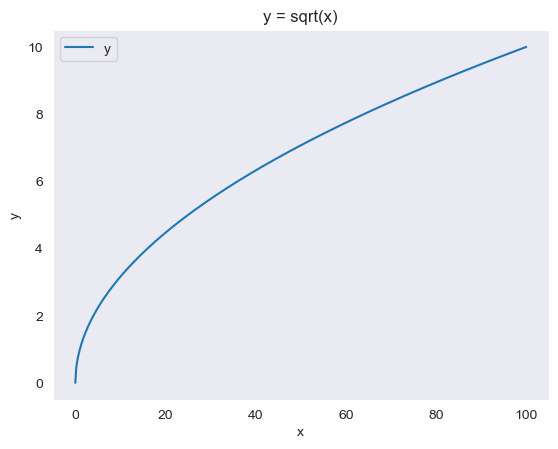

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建一个 DataFrame
data = pd.DataFrame({
    'x': np.linspace(0, 100, 500)  # 创建 0 到 100 的等间距数据
})

# 添加平方根列
data['y'] = np.sqrt(data['x'])

# 使用 Pandas 绘制
data.plot(x='x', y='y', kind='line', title='y = sqrt(x)', legend=True)

# 显示图表
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


In [18]:
train_labels = pd.Series([10, 20, 30, 40, 50])
train_labels


0    10
1    20
2    30
3    40
4    50
dtype: int64

In [19]:
# 转换为 NumPy 数组并展平为一维
y = train_labels.values.reshape(-1,)
y

array([10, 20, 30, 40, 50], dtype=int64)

In [20]:
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

In [21]:
train_features

,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Direct GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Latitude,...,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,5849784,90300.0,1950,1,100,126.0,1.2,440.9,7684.7,NaN,...,False,False,False,False,False,False,False,False,False,False
1,4398442,52000.0,1926,1,100,95.4,0.9,217.9,NaN,40.835496,...,False,False,False,False,False,False,False,False,False,False
2,4665374,104700.0,1954,1,100,40.4,0.3,151.0,NaN,40.663206,...,False,False,False,False,False,False,False,False,False,False
3,3393340,129333.0,1992,1,100,157.1,1.1,672.4,NaN,40.622968,...,False,False,False,True,False,False,False,False,False,False
4,2704325,109896.0,1927,1,100,62.3,0.0,456.5,3493.9,40.782421,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,4044737,55400.0,1958,1,90,72.3,0.7,203.6,3227.1,40.897985,...,False,False,False,False,False,False,False,False,False,False
6618,2609697,106500.0,1928,1,100,73.7,0.0,482.0,8269.8,40.876060,...,False,False,False,False,False,False,False,False,False,False
6619,3119428,112339.0,1962,1,100,88.0,0.7,449.6,9140.7,40.855922,...,False,False,False,False,False,False,False,False,False,False
6620,5039588,100244.0,1927,1,50,26.6,NaN,0.0,762.7,40.754436,...,False,False,False,False,False,False,False,False,False,False


In [29]:
test_labels

,score
0,13.0
1,55.0
2,87.0
3,99.0
4,87.0
...,...
2834,83.0
2835,95.0
2836,83.0
2837,51.0


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# 训练填充器
imputer.fit(train_features)

SimpleImputer(strategy='median')

In [24]:
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [28]:
train_labels

,score
0,16.0
1,53.0
2,99.0
3,35.0
4,91.0
...,...
6617,82.0
6618,88.0
6619,41.0
6620,97.0


In [26]:
y = train_labels.values.reshape((-1,))
y

array([16., 53., 99., ..., 41., 97., 67.])

In [27]:
y_test = test_labels.values.reshape((-1,))
y

array([16., 53., 99., ..., 41., 97., 67.])